In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Machince learning techniques for Anomaly Detection
Group ID: 9785-23-01
Project ID: 2023-S1-49

Version 1.0.0
05 March 2023

@authors: 
Caity Ngov
Ethan
Nigel
Fahad

"""

'\nMachince learning techniques for Anomaly Detection\nGroup ID: 9785-23-01\nProject ID: 2023-S1-49\n\nVersion 1.0.0\n05 March 2023\n\n@authors: \nCaity Ngov\nEthan\nNigel\nFahad\n\n'

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [2]:
# Standard imports
import os 

# Dependencies
import pandas as pd
from IPython.display import display
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Current Working Directory
cwd = os.getcwd()
cwd

'/home/caity/ICT-capstone-Project'

In [4]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
### Checking for null values
print('Null Values -', df.isnull().values.any())

Null Values - False


## EDA

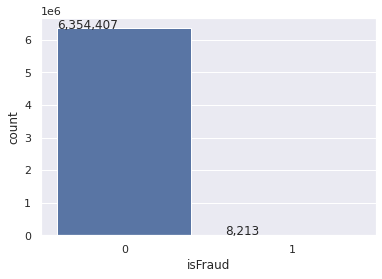

In [6]:
df['isFraud'].value_counts()
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="isFraud", data=df)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

In [7]:
import math
a= (8213/(6354407+8213))*100
print ('The percentage of Fraud transactions is ' "%.2f" % a, '%' )

The percentage of Fraud transactions is 0.13 %


In [8]:
fraud_df = df[(df['isFraud'] == 1)] 
fraud_df   

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [9]:
cash_out_df = fraud_df[(fraud_df['type'] == 'CASH_OUT')] 
cash_out_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [10]:
#Pivot table
df_pivot1=pd.pivot_table(df,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("blue", as_cmap=True)
df_pivot1.style.background_gradient(cmap=cm)

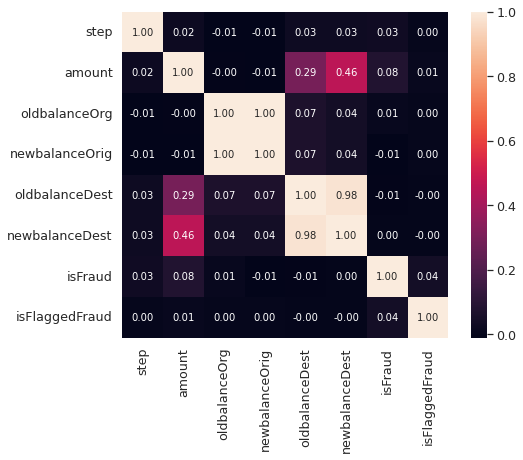

In [11]:
corrmat = df.corr()
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns)

## Distribution of the Transaction Type Column

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


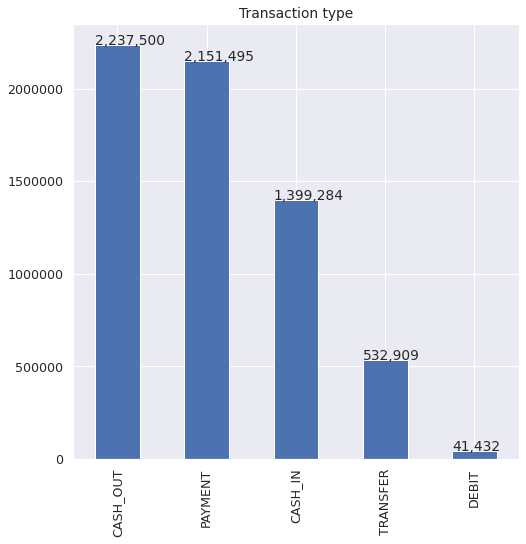

In [12]:
print(df.type.value_counts())
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

Number of transactions that is safe - 6354407

Number of transactions that are Fraud but not Flagged by the system - 8197

Number of transactions that are Fraud and are Flagged bt the system - 16

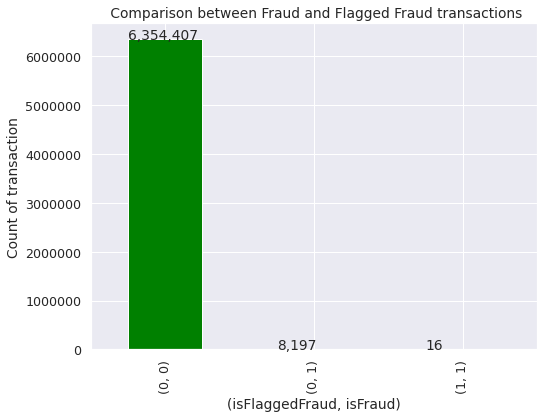

In [13]:
#Relation Between the Fraud Transactions and the transactions Flagged by the system

ax = df.groupby(['isFlaggedFraud','isFraud']).size().plot(kind='bar',figsize=(8, 6), color='green')
ax.set_title(" Comparison between Fraud and Flagged Fraud transactions")
ax.set_xlabel("(isFlaggedFraud, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))



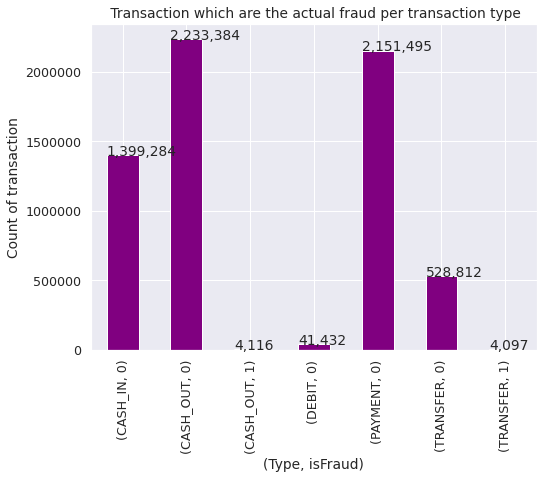

In [14]:
# Fraud transactions and Transaction types

ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))



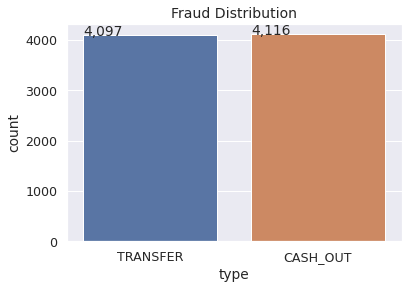

In [15]:
ax=sns.countplot('type', data=fraud_df)
plt.title('Fraud Distribution', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

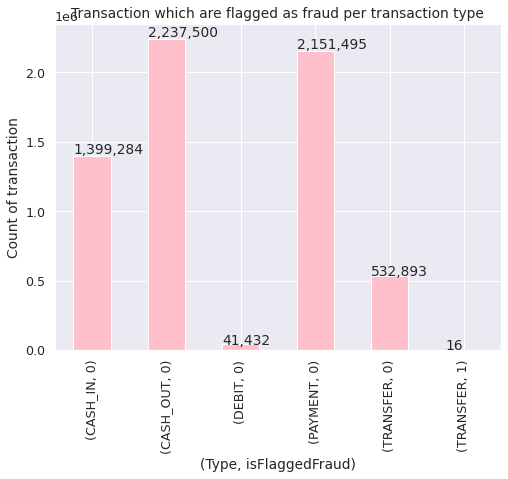

In [16]:


ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar',figsize=(8, 6), color='pink')
ax.set_title("Transaction which are flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))



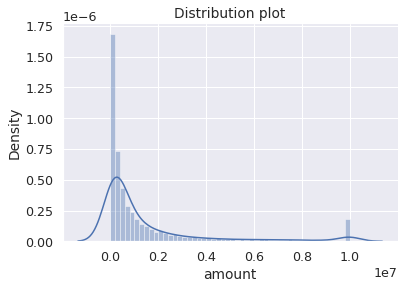

In [17]:
sns.distplot(cash_out_df['amount'])
plt.title("Distribution plot")
sns.despine()
plt.show()

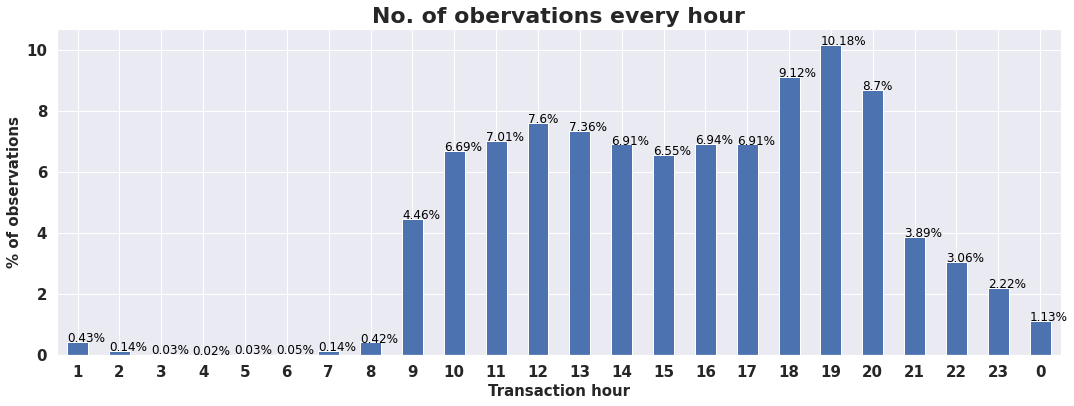

In [18]:
# transaction hour
df['transactionHour'] = df['step'] % 24

# converting into object type
df['transactionHour'] = df['transactionHour'].astype('object')
# number of transactions in each hour
plt.figure(figsize=(18,6))
ax = (df['transactionHour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Transaction hour', fontsize=15, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('% of observations', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('No. of obervations every hour', fontsize=22, fontweight='bold')
plt.show()

## Dealing with Account Ids 'nameOrig' and 'nameDest'

In [19]:
print('All Transactions ',df['nameOrig'].size)
print('Unique Transactions ',df['nameOrig'].unique().size)
print('Transactions from existing accounts ',df['nameOrig'].size-df['nameOrig'].unique().size)

All Transactions  6362620
Unique Transactions  6353307
Transactions from existing accounts  9313


In [20]:
print('All Transactions ',df['nameDest'].size)
print('Unique Transactions ',df['nameDest'].unique().size)
print('Transactions from existing accounts ',df['nameDest'].size-df['nameOrig'].unique().size)

All Transactions  6362620
Unique Transactions  2722362
Transactions from existing accounts  9313


In [21]:
print(format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any()))

False


no merchants among originator accounts for CASH_IN transactions

In [22]:
print(format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any()))

False


there's none merchants among destination accounts for CASH_OUT \
transactions

In [23]:
print(format(\
      df.nameOrig.str.contains('M').any())) 

print(format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any()))

False
False


there's none merchants among any originator accounts and none transactions having merchants among destination accounts other than the PAYMENT type.

In [24]:
wrong_orig_bal = sum(df["oldbalanceOrg"] - df["amount"] != df["newbalanceOrig"])
wrong_dest_bal = sum(df["newbalanceDest"] + df["amount"] != df["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(df),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(df),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


## Futher Pre-processing

In [25]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

### One hot encoding

In [26]:
#One hot encoding
df=pd.concat([df,pd.get_dummies(df['type'], prefix='type_')],axis=1)
df.drop(['type'],axis=1,inplace = True)

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,transactionHour,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,1,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,1,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,1,0,0,0,1,0


### Split data

In [27]:
from collections import Counter
#Splitting dependent and independent variable
df2=df.copy()
X=df2.drop('isFraud',axis=1)
y=df2['isFraud']
# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features_train = X[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
X[col_names] = features_train

## Model Selection

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
lasso = SVC()
y_pred = cross_val_predict(lasso, X, y, cv=3)
print(classification_report(y, y_pred))

## Feature Selection with XGBoost Feature Importance Scores

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);